Import Statements for json, numpy, and pandas

In [141]:
import pandas as pd
import numpy as np
import json
from IPython.display import Markdown, display
import matplotlib.pyplot as plt

Open each json file and convert to pandas DataFrame

In [129]:
with open('./fabindia/fab_women_rgb.json') as fw:
    fw_data = json.load(fw)
pfw = pd.DataFrame(fw_data)
with open('./fabindia/fab_men_rgb.json') as fm:
    fm_data = json.load(fm)
pfm = pd.DataFrame(fm_data)
with open('./fabindia/fab_kids_rgb.json') as fk:
    fk_data = json.load(fk)
pfk = pd.DataFrame(fk_data)

with open('./biba/biba_rgb.json') as biba:
    biba_data = json.load(biba)
pbiba = pd.DataFrame(biba_data)

with open('./global_desi/global_girls_rgb.json') as gg:
    gg_data = json.load(gg)
pgg = pd.DataFrame(gg_data)
with open('./global_desi/global_women_rgb.json') as gw:
    gw_data = json.load(gw) 
pgw = pd.DataFrame(gw_data)

pmasterfab = pd.concat([pfw, pfm, pfk], ignore_index=True)
pmastergd = pd.concat([pgg, pgw], ignore_index=True)

pmaster = pd.concat([pmasterfab, pbiba, pmastergd], ignore_index=True)

pwomen = pd.concat([pfw, pgw, pbiba], ignore_index=True)
pkids = pd.concat([pfk, pgg], ignore_index=True)

In [130]:
pmaster.head()

,image,name,price,index,average_rgb
0,https://apisap.fabindia.com/medias/2125359001-...,Metal Jhumka Earrings,61.5,0,NaN
1,https://apisap.fabindia.com/medias/20205294-01...,Pink Cotton Silk Embroidered Stole,46.0,1,"[182, 123, 112]"
2,https://apisap.fabindia.com/medias/20209437-01...,Green Cotton Printed Long Kurta,92.0,2,"[207, 155, 135]"
3,https://apisap.fabindia.com/medias/20191625-01...,Green Cotton Silk Printed Short Kurta,70.5,3,"[187, 135, 107]"
4,https://apisap.fabindia.com/medias/20173020-01...,Grey Cotton Silk Hand Block Printed Short Kurta,58.5,4,"[213, 171, 158]"


In [131]:
def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % rgb

pmaster.info()
pmaster.describe()
pmaster['average_rgb']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982 entries, 0 to 981
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   image        982 non-null    object 
 1   name         982 non-null    object 
 2   price        982 non-null    float64
 3   index        982 non-null    int64  
 4   average_rgb  763 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 38.5+ KB


0                  NaN
1      [182, 123, 112]
2      [207, 155, 135]
3      [187, 135, 107]
4      [213, 171, 158]
            ...       
977                NaN
978                NaN
979                NaN
980                NaN
981                NaN
Name: average_rgb, Length: 982, dtype: object

In [132]:
pmaster = pmaster.dropna(subset=['average_rgb'])

pmaster['average_rgb'] = pmaster['average_rgb'].apply(lambda x: tuple(x))

pmaster['average_hex'] = pmaster['average_rgb'].apply(rgb_to_hex)

In [133]:
pmaster['average_rgb']
pmaster['average_hex']

1      #b67b70
2      #cf9b87
3      #bb876b
4      #d5ab9e
5      #d09f8e
        ...   
968    #c79b85
969    #cb9677
970    #d2a187
971    #dea68c
972    #b88875
Name: average_hex, Length: 763, dtype: object

In [134]:
for i in range(len(pmaster)):
    brightness =  0.2126 * pmaster.iloc[i]['average_rgb'][0] + 0.7152 * pmaster.iloc[i]['average_rgb'][1] + 0.0722 * pmaster.iloc[i]['average_rgb'][2]
    pmaster.at[i, 'brightness'] = brightness

pmaster = pmaster.dropna(subset=['brightness'])
pmaster.head()

,image,name,price,index,average_rgb,average_hex,brightness
1,https://apisap.fabindia.com/medias/20205294-01...,Pink Cotton Silk Embroidered Stole,46.0,1.0,"(182, 123, 112)",#b67b70,164.6112
2,https://apisap.fabindia.com/medias/20209437-01...,Green Cotton Printed Long Kurta,92.0,2.0,"(207, 155, 135)",#cf9b87,144.0336
3,https://apisap.fabindia.com/medias/20191625-01...,Green Cotton Silk Printed Short Kurta,70.5,3.0,"(187, 135, 107)",#bb876b,178.9906
4,https://apisap.fabindia.com/medias/20173020-01...,Grey Cotton Silk Hand Block Printed Short Kurta,58.5,4.0,"(213, 171, 158)",#d5ab9e,168.1900
5,https://apisap.fabindia.com/medias/20191606-01...,Red Cotton Woven Long Kurta,49.0,5.0,"(208, 159, 142)",#d09f8e,170.4800


In [135]:
pmaster = pmaster.sort_values(by='brightness', ascending=False)
pmaster.head()
pmaster.tail()


,image,name,price,index,average_rgb,average_hex,brightness
185,https://apisap.fabindia.com/medias/20174840-01...,Natural Cotton Full Length Drawstring Pant,31.0,57.0,"(128, 73, 57)",#804939,56.2714
163,https://apisap.fabindia.com/medias/20164378-01...,Black Cotton Jamdani Choti Buti Regular Shirt,77.0,35.0,"(201, 152, 139)",#c9988b,55.6136
174,https://apisap.fabindia.com/medias/20183577-01...,Multi Cotton Printed Short Kurta,46.0,46.0,"(164, 112, 85)",#a47055,51.0548
113,https://apisap.fabindia.com/medias/20173087-01...,Teal Cotton Ajrakh Printed Knee Length Kurta,58.5,113.0,"(227, 191, 170)",#e3bfaa,50.6244
199,https://apisap.fabindia.com/medias/20164585-01...,Orange Cotton Striped Regular Shirt,40.0,71.0,"(154, 125, 117)",#9a7d75,44.4200


In [136]:
display(Markdown('<br>'.join(
    f'<span style="font-family: monospace">{color} <span style="color: {color}">████████</span></span>'
    for color in pmaster['average_hex'].head(10)
)))

display(Markdown('<br>'.join(
    f'<span style="font-family: monospace">{color} <span style="color: {color}">████████</span></span>'
    for color in pmaster['average_hex'].tail(10)
)))


<span style="font-family: monospace">#f3aa76 <span style="color: #f3aa76">████████</span></span><br><span style="font-family: monospace">#ae897e <span style="color: #ae897e">████████</span></span><br><span style="font-family: monospace">#d9c0a3 <span style="color: #d9c0a3">████████</span></span><br><span style="font-family: monospace">#ebd4b4 <span style="color: #ebd4b4">████████</span></span><br><span style="font-family: monospace">#cd9d94 <span style="color: #cd9d94">████████</span></span><br><span style="font-family: monospace">#dcc3a7 <span style="color: #dcc3a7">████████</span></span><br><span style="font-family: monospace">#dbc3a7 <span style="color: #dbc3a7">████████</span></span><br><span style="font-family: monospace">#ef8157 <span style="color: #ef8157">████████</span></span><br><span style="font-family: monospace">#c0a68c <span style="color: #c0a68c">████████</span></span><br><span style="font-family: monospace">#a97a63 <span style="color: #a97a63">████████</span></span>

<span style="font-family: monospace">#a15541 <span style="color: #a15541">████████</span></span><br><span style="font-family: monospace">#d5846b <span style="color: #d5846b">████████</span></span><br><span style="font-family: monospace">nan <span style="color: nan">████████</span></span><br><span style="font-family: monospace">#a48663 <span style="color: #a48663">████████</span></span><br><span style="font-family: monospace">#8b7065 <span style="color: #8b7065">████████</span></span><br><span style="font-family: monospace">#804939 <span style="color: #804939">████████</span></span><br><span style="font-family: monospace">#c9988b <span style="color: #c9988b">████████</span></span><br><span style="font-family: monospace">#a47055 <span style="color: #a47055">████████</span></span><br><span style="font-family: monospace">#e3bfaa <span style="color: #e3bfaa">████████</span></span><br><span style="font-family: monospace">#9a7d75 <span style="color: #9a7d75">████████</span></span>

In [137]:
pmaster.head()

,image,name,price,index,average_rgb,average_hex,brightness
344,https://apisap.fabindia.com/medias/20166900-01...,Yellow Cotton Printed 3Pc Lehenga Set,123.0,85.0,"(243, 170, 118)",#f3aa76,223.4234
85,https://apisap.fabindia.com/medias/20165090-01...,Natural Cotton Silk Hand Block Printed Sari,92.0,85.0,"(174, 137, 126)",#ae897e,221.8522
234,https://apisap.fabindia.com/medias/20170847-01...,Pink Viscose Silk Pintucks Long Kurta,119.5,106.0,"(217, 192, 163)",#d9c0a3,221.4350
213,https://apisap.fabindia.com/medias/20146129-01...,Offwhite Cotton Slim Fit Jama Pants,52.5,85.0,"(235, 212, 180)",#ebd4b4,220.5754
202,https://apisap.fabindia.com/medias/20121591-01...,Brown Cotton Comfort Fit Drawstring Pants,31.0,74.0,"(205, 157, 148)",#cd9d94,219.6476


In [138]:
pmaster['average_hex'].head()

344    #f3aa76
85     #ae897e
234    #d9c0a3
213    #ebd4b4
202    #cd9d94
Name: average_hex, dtype: object

In [139]:
pmaster.describe()

,price,index,brightness
count,628.000000,628.000000,763.000000
mean,46.613057,73.791401,146.335036
std,35.610163,58.579186,35.846725
min,3.000000,0.000000,44.420000
25%,18.000000,30.000000,124.445700
50%,43.000000,62.000000,148.524600
75%,61.500000,100.250000,171.131500
max,214.500000,254.000000,223.423400


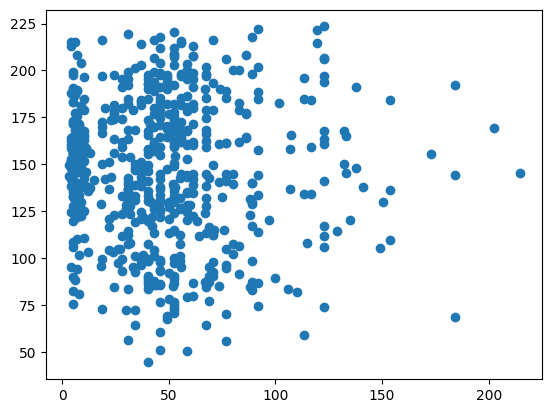

In [142]:
plt.scatter(pmaster['price'], pmaster['brightness'])

In [170]:
pmaster = pmaster.dropna(subset=['average_rgb'])

pmaster['average_rgb'] = pmaster['average_rgb'].apply(lambda x: tuple(x))
reds = []
greens = []
blues = []

for i in range(len(pmaster)):
    reds.append(pmaster.iloc[i]['average_rgb'][0])
    greens.append(pmaster.iloc[i]['average_rgb'][1])
    blues.append(pmaster.iloc[i]['average_rgb'][2])

pmaster['reds'] = reds
pmaster['greens'] = greens
pmaster['blues'] = blues

pmaster.describe()


,price,index,brightness,reds,greens,blues
count,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000
mean,46.613057,73.791401,146.198989,183.133758,137.816879,111.941083
std,35.610163,58.579186,37.734481,38.457184,38.704004,36.421177
min,3.000000,0.000000,44.420000,83.000000,26.000000,18.000000
25%,18.000000,30.000000,121.752700,159.750000,113.000000,85.000000
50%,43.000000,62.000000,147.827000,188.000000,137.000000,111.000000
75%,61.500000,100.250000,173.427450,213.000000,165.000000,139.000000
max,214.500000,254.000000,223.423400,253.000000,219.000000,193.000000


In [172]:
average_hex = rgb_to_hex((183,138,112))
darkest_hex = rgb_to_hex((83, 26, 18))
lightest_hex = rgb_to_hex((253, 219, 193))

show = (average_hex, darkest_hex, lightest_hex)

In [173]:
display(Markdown('<br>'.join(
    f'<span style="font-family: monospace">{color} <span style="color: {color}">████████</span></span>'
    for color in show
)))

<span style="font-family: monospace">#b78a70 <span style="color: #b78a70">████████</span></span><br><span style="font-family: monospace">#531a12 <span style="color: #531a12">████████</span></span><br><span style="font-family: monospace">#fddbc1 <span style="color: #fddbc1">████████</span></span>

In [175]:
pwomen = pwomen.dropna(subset=['average_rgb'])

pwomen['average_rgb'] = pwomen['average_rgb'].apply(lambda x: tuple(x))
reds = []
greens = []
blues = []

for i in range(len(pwomen)):
    reds.append(pwomen.iloc[i]['average_rgb'][0])
    greens.append(pwomen.iloc[i]['average_rgb'][1])
    blues.append(pwomen.iloc[i]['average_rgb'][2])

pwomen['reds'] = reds
pwomen['greens'] = greens
pwomen['blues'] = blues

pwomen.describe()


,price,index,reds,greens,blues
count,378.000000,378.000000,378.000000,378.000000,378.000000
mean,56.907407,86.089947,180.748677,137.201058,110.970899
std,35.299317,67.105700,36.578215,35.458450,33.122259
min,8.000000,0.000000,88.000000,42.000000,26.000000
25%,31.000000,34.000000,157.000000,113.000000,87.250000
50%,46.500000,71.000000,186.000000,142.500000,110.000000
75%,70.875000,121.000000,209.000000,161.750000,134.000000
max,214.500000,254.000000,246.000000,219.000000,181.000000


In [176]:
w_average_hex = rgb_to_hex((181, 137, 111))
w_darkest_hex = rgb_to_hex((88, 42, 26))
w_lightest_hex = rgb_to_hex((246, 219, 181))

show = (w_average_hex, w_darkest_hex, w_lightest_hex)

display(Markdown('<br>'.join(
    f'<span style="font-family: monospace">{color} <span style="color: {color}">████████</span></span>'
    for color in show
)))

<span style="font-family: monospace">#b5896f <span style="color: #b5896f">████████</span></span><br><span style="font-family: monospace">#582a1a <span style="color: #582a1a">████████</span></span><br><span style="font-family: monospace">#f6dbb5 <span style="color: #f6dbb5">████████</span></span>

In [177]:
pfm = pfm.dropna(subset=['average_rgb'])

pfm['average_rgb'] = pfm['average_rgb'].apply(lambda x: tuple(x))
reds = []
greens = []
blues = []

for i in range(len(pfm)):
    reds.append(pfm.iloc[i]['average_rgb'][0])
    greens.append(pfm.iloc[i]['average_rgb'][1])
    blues.append(pfm.iloc[i]['average_rgb'][2])

pfm['reds'] = reds
pfm['greens'] = greens
pfm['blues'] = blues

pfm.describe()

,price,index,reds,greens,blues
count,131.000000,131.000000,131.000000,131.000000,131.000000
mean,55.564885,65.000000,177.229008,138.290076,111.671756
std,17.359369,37.960506,40.965945,47.809637,42.957124
min,31.000000,0.000000,83.000000,26.000000,18.000000
25%,43.000000,32.500000,151.000000,108.000000,81.000000
50%,52.500000,65.000000,177.000000,131.000000,106.000000
75%,67.500000,97.500000,210.000000,182.000000,153.500000
max,119.500000,130.000000,242.000000,219.000000,185.000000


In [178]:
m_average_hex = rgb_to_hex((177, 138, 112))
m_darkest_hex = rgb_to_hex((83, 26, 18))
m_lightest_hex = rgb_to_hex((242, 219, 185))

show = (m_average_hex, m_darkest_hex, m_lightest_hex)

display(Markdown('<br>'.join(
    f'<span style="font-family: monospace">{color} <span style="color: {color}">████████</span></span>'
    for color in show
)))

<span style="font-family: monospace">#b18a70 <span style="color: #b18a70">████████</span></span><br><span style="font-family: monospace">#531a12 <span style="color: #531a12">████████</span></span><br><span style="font-family: monospace">#f2dbb9 <span style="color: #f2dbb9">████████</span></span>

In [179]:
pkids = pkids.dropna(subset=['average_rgb'])

pkids['average_rgb'] = pkids['average_rgb'].apply(lambda x: tuple(x))
reds = []
greens = []
blues = []

for i in range(len(pkids)):
    reds.append(pkids.iloc[i]['average_rgb'][0])
    greens.append(pkids.iloc[i]['average_rgb'][1])
    blues.append(pkids.iloc[i]['average_rgb'][2])

pkids['reds'] = reds
pkids['greens'] = greens
pkids['blues'] = blues

pkids.describe()

,price,index,reds,greens,blues
count,254.000000,254.000000,254.000000,254.000000,254.000000
mean,24.425197,101.059055,191.094488,141.437008,111.590551
std,30.050720,72.669595,32.489447,33.416671,32.989723
min,3.000000,0.000000,91.000000,48.000000,30.000000
25%,6.000000,42.250000,174.250000,123.000000,91.000000
50%,9.000000,81.500000,193.000000,142.500000,114.000000
75%,34.000000,154.750000,213.000000,160.750000,132.750000
max,150.500000,254.000000,253.000000,218.000000,193.000000


In [180]:
k_average_hex = rgb_to_hex((191, 141, 112))
k_darkest_hex = rgb_to_hex((91, 48, 30))
k_lightest_hex = rgb_to_hex((253, 218, 193))

show = (k_average_hex, k_darkest_hex, k_lightest_hex)

display(Markdown('<br>'.join(
    f'<span style="font-family: monospace">{color} <span style="color: {color}">████████</span></span>'
    for color in show
)))

<span style="font-family: monospace">#bf8d70 <span style="color: #bf8d70">████████</span></span><br><span style="font-family: monospace">#5b301e <span style="color: #5b301e">████████</span></span><br><span style="font-family: monospace">#fddac1 <span style="color: #fddac1">████████</span></span>

In [181]:
averages = (average_hex, w_average_hex, m_average_hex, k_average_hex)
darkest = (darkest_hex, w_darkest_hex, m_darkest_hex, k_darkest_hex)    
lightest = (lightest_hex, w_lightest_hex, m_lightest_hex, k_lightest_hex)

display(Markdown('<br>'.join(
    f'<span style="font-family: monospace">{color} <span style="color: {color}">████████</span></span>'
    for color in averages
)))

display(Markdown('<br>'.join(
    f'<span style="font-family: monospace">{color} <span style="color: {color}">████████</span></span>'
    for color in darkest
)))

display(Markdown('<br>'.join(
    f'<span style="font-family: monospace">{color} <span style="color: {color}">████████</span></span>'
    for color in lightest
)))

NameError: name 'w_average_hex' is not defined